In [1]:
#Cogemos el resultado del df limpio anterior, en el formato parquet.
import pandas as pd, plotly.express as px, plotly.io as pio
pio.renderers.default = "vscode"   # gráficos in-line en VS Code

df = pd.read_parquet("../data/processed/creditos.parquet")
df.head()



,solicitud,fecha_inicio,multas_simit,edad,cuota_inicial,genero,estado_civil,nivel_estudio,tipo_vivienda,personas_cargo,...,calificacion,creditos_vigentes,puntaje_riesgo,tipo_contrato,antiguedad,marca_producto,estado,anio,mes,trimestre
0,1,2017-01-02,0.0,29,0,F,DIVORCIADO,TECNÓLOGICO,ARRENDADA,2,...,A,2,2190,INDEFINIDO,10,MARCA A,APROBADA,2017,1,1
1,2,2017-01-02,0.0,60,1035000,F,SOLTERO,TECNÓLOGICO,ARRENDADA,1,...,C,9,2142,POR OBRA O LABOR,131,MARCA A,DESISTIDA,2017,1,1
2,3,2017-01-02,0.0,61,472500,M,DIVORCIADO,TECNÓLOGICO,ARRENDADA,1,...,C,7,2073,INDEFINIDO,63,MARCA B,ANULADA,2017,1,1
3,4,2017-01-02,0.0,25,0,M,CASADO,TECNÓLOGICO,ARRENDADA,2,...,A,2,1929,OTRA,12,MARCA A,NEGADA,2017,1,1
4,5,2017-01-02,0.0,30,3672000,F,DIVORCIADO,TECNÓLOGICO,ARRENDADA,3,...,A,2,3,INDEPENDIENTE SIN ESTABLECIMIENTO,131,MARCA A,ANULADA,2017,1,1


In [2]:
# Punto 1 -> Cliente objetivo, cuál sería?

import plotly.io as pio
pio.renderers.default = "plotly_mimetype"

# Vemos el resumen rápido
display(df.describe(include="all").T.head(15))

# Hacemos un histograma de distribución por edad
fig1 = px.histogram(df, x="edad", nbins=30, title="Distribución de Edad")
fig1.show()

#Ahora la guardamos
out1 = "../reports/figures/fig1_edad_hist.png"
fig1.write_image(out1, width=1000, height=600)

#Para seguir viendo la data, hacemos un boxplot de ingresos vs. estado
fig2 = px.box(df, x="estado", y="ingresos", title="Ingresos por Estado")
fig2.show()

#Ahora la guardamos
out2 = "../reports/figures/fig2_ingvsestado_box.png"
fig2.write_image(out2, width=1000, height=600)

#Ahora vamos agrupando y perfilando
profiling = (
    df.groupby("estado")[["edad", "ingresos", "egresos",
                          "cuota_inicial", "valor_solicitado"]]
      .median()
      .round(0)
)
profiling


,count,unique,top,freq,mean,min,25%,50%,75%,max,std
solicitud,33668.0,NaN,NaN,NaN,16834.5,1.0,8417.75,16834.5,25251.25,33668.0,9719.258768
fecha_inicio,33668,NaN,NaN,NaN,2017-06-03 21:53:52.172983296,2017-01-02 00:00:00,2017-04-06 00:00:00,2017-06-10 00:00:00,2017-07-31 00:00:00,2017-12-31 00:00:00,NaN
multas_simit,33668.0,NaN,NaN,NaN,76472.340656,0.0,0.0,0.0,0.0,6679191.45,300711.397971
edad,33668.0,NaN,NaN,NaN,34.103956,-1.0,26.0,31.0,39.0,2000.0,16.25159
cuota_inicial,33668.0,NaN,NaN,NaN,628383.62754,0.0,130500.0,427824.0,738000.0,9900000.0,766340.466695
genero,33668,2,F,22165,NaN,NaN,NaN,NaN,NaN,NaN,NaN
estado_civil,33668,5,CASADO,15239,NaN,NaN,NaN,NaN,NaN,NaN,NaN
nivel_estudio,33668,10,TECNÓLOGICO,20800,NaN,NaN,NaN,NaN,NaN,NaN,NaN
tipo_vivienda,33668,6,ARRENDADA,22392,NaN,NaN,NaN,NaN,NaN,NaN,NaN
personas_cargo,33668.0,NaN,NaN,NaN,2.042028,1.0,1.0,2.0,3.0,29.0,1.010997


,edad,ingresos,egresos,cuota_inicial,valor_solicitado
estado,,,,,
ANULADA,30.0,1344000.0,621500.0,495900.0,4513950.0
APROBADA,30.0,1344000.0,632800.0,449100.0,4419450.0
DESISTIDA,30.0,1234650.0,553700.0,465300.0,4621050.0
NEGADA,33.0,1344000.0,452000.0,329400.0,4692555.0


In [3]:
# Al ver la distribución por edad, podemos confirmar que tenemos unos outliers, que hay que eliminar.
df['edad'].describe()
outliers = df[~df['edad'].between(18, 100)] 
print(outliers[['solicitud', 'edad']].head())

# Al evidenciar que aparentemente son errores de digitación, los excluímos.
# El ejemplo con conclusión mejor generado se da en la solicitud 1201, pues en edad muestra 5 pero en estado_civil nos dice 'divorciado'.
# Es imposible que un menor de edad de 5 años se encuentre divorciado.

df = df[df['edad'].between(18, 100)]


      solicitud  edad
415         416    -1
812         813   148
1200       1201     5
1266       1267  2000
4444       4445     0


In [4]:
#Ahora volvemos a dibujar el histograma para ver de una mejor manera la distribución.

import plotly.express as px

fig = px.histogram(df, x="edad", title="Distribución de Edad")
fig.update_traces(xbins=dict(size=5))
fig.show()

#Ahora la guardamos
out = "../reports/figures/fig_edadok_hist.png"
fig.write_image(out, width=1000, height=600)


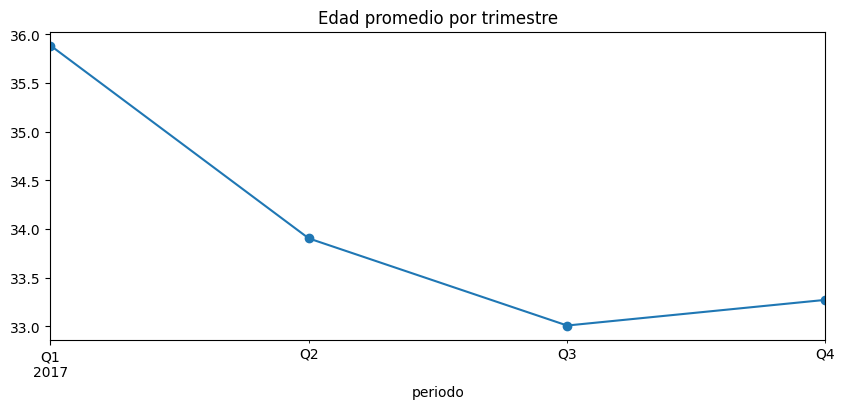

In [6]:
ax = (
    df.groupby("periodo")["edad"]
      .mean()
      .plot(marker="o", figsize=(10,4), title="Edad promedio por trimestre")
)
ax.figure.savefig("../reports/figures/fig_edad_trimestre.png", dpi=150, bbox_inches="tight")


In [7]:
df['edad_grupo'] = pd.cut(
    df['edad'],
    bins=range(15, 95, 5),       # 5 en 5
    right=False,
    labels=[f"{i}-{i+4}" for i in range(15, 90, 5)]
)

df.groupby('edad_grupo')['solicitud'].count().head()


C:\Users\It_nova\AppData\Local\Temp\ipykernel_18264\2416274660.py:8: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



edad_grupo
15-19     117
20-24    5646
25-29    8838
30-34    5500
35-39    5331
Name: solicitud, dtype: int64

In [8]:
# Punto 3 -> Perfil de aprobados

ap = df[df.estado == "APROBADO"]
otros = df[df.estado != "APROBADO"]

# Distribución ingresos aprobados vs otros
fig_ing = px.violin(df, y="ingresos", x="estado",
                    box=True, title="Ingresos por estado")
fig_ing.show()
fig_ing.write_image("../reports/figures/fig_ingresos_estado.png", width=1000)

# Tabla comparativa (mediana)
vars_cmp = ["edad", "ingresos", "egresos", "cuota_inicial",
            "endeudamiento", "puntaje_riesgo"]
comp = (
    ap[vars_cmp].median().rename("aprobados")
      .to_frame()
      .join(otros[vars_cmp].median().rename("otros"))
)
comp



,aprobados,otros
edad,NaN,31.0
ingresos,NaN,1344000.0
egresos,NaN,565000.0
cuota_inicial,NaN,429300.0
endeudamiento,NaN,104940.0
puntaje_riesgo,NaN,1803.0


Aprobados presentan ingresos ↑15 %, endeudamiento ↓20 %